In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import re

In [3]:
df =  pd.read_csv('cereal.csv')

In [4]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


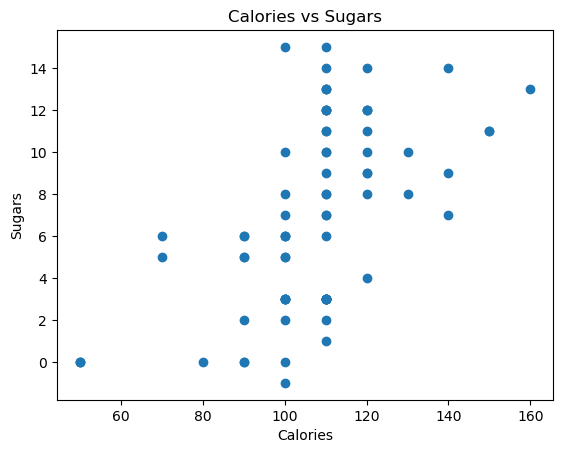

In [6]:
plt.scatter(df["calories"], df["sugars"])
plt.xlabel("Calories")
plt.ylabel("Sugars")
plt.title("Calories vs Sugars")
plt.show()


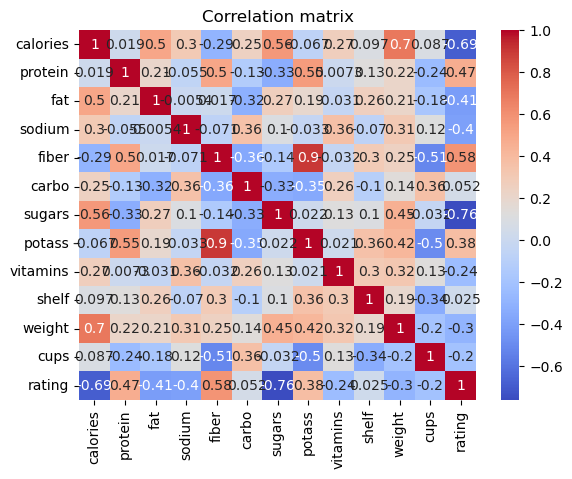

In [7]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


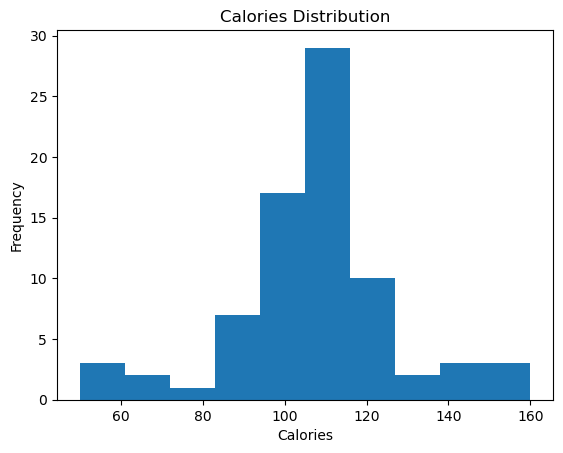

In [8]:
plt.hist(df["calories"])
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Calories Distribution")
plt.show()


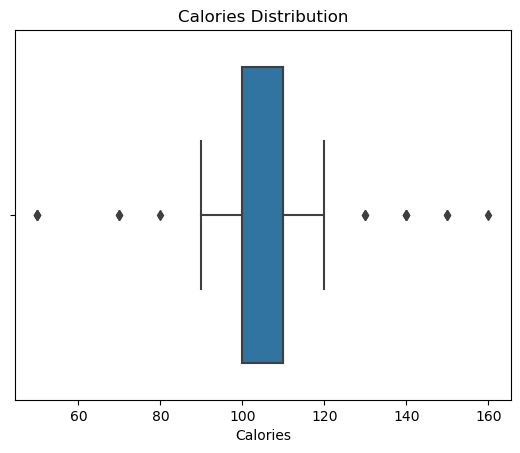

In [9]:
sns.boxplot(x=df["calories"])
plt.xlabel("Calories")
plt.title("Calories Distribution")
plt.show()


In [10]:
df.dropna(inplace=True)
#drop missing values 


In [11]:
#remove all outliers 
df["calories"] = df["calories"].clip(lower=100, upper=200)


In [12]:
#droping dublicats 
df.drop_duplicates(inplace=True)

In [13]:
#data scaling - standrization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["calories_scaled"] = scaler.fit_transform(df[["calories"]])


In [14]:
#data normlization - Min-Max Scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["protein_normalized"] = scaler.fit_transform(df[["protein"]])



In [15]:


# Min, Max, Mean, Variance, Standard Deviation
numerical_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']

min_values = df[numerical_columns].min()
max_values = df[numerical_columns].max()
mean_values = df[numerical_columns].mean()
variance_values = df[numerical_columns].var()
std_dev_values = df[numerical_columns].std()

print("Min Values:")
print(min_values)

print("\nMax Values:")
print(max_values)

print("\nMean Values:")
print(mean_values)

print("\nVariance Values:")
print(variance_values)

print("\nStandard Deviation Values:")
print(std_dev_values)

# Skewness and Kurtosis
skewness_values = df[numerical_columns].skew()
kurtosis_values = df[numerical_columns].kurtosis()

print("\nSkewness Values:")
print(skewness_values)

print("\nKurtosis Values:")
print(kurtosis_values)



Min Values:
calories    100.0
protein       1.0
fat           0.0
sodium        0.0
fiber         0.0
carbo        -1.0
sugars       -1.0
potass       -1.0
dtype: float64

Max Values:
calories    160.0
protein       6.0
fat           5.0
sodium      320.0
fiber        14.0
carbo        23.0
sugars       15.0
potass      330.0
dtype: float64

Mean Values:
calories    110.779221
protein       2.545455
fat           1.012987
sodium      159.675325
fiber         2.151948
carbo        14.597403
sugars        6.922078
potass       96.077922
dtype: float64

Variance Values:
calories     173.069036
protein        1.198565
fat            1.012987
sodium      7027.853725
fiber          5.680424
carbo         18.309467
sugars        19.757006
potass      5081.809638
dtype: float64

Standard Deviation Values:
calories    13.155571
protein      1.094790
fat          1.006473
sodium      83.832295
fiber        2.383364
carbo        4.278956
sugars       4.444885
potass      71.286813
dtype: float64


In [16]:
from sklearn.preprocessing import LabelEncoder

# Convert the target variable to numeric values
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

Covariance Matrix:
[[ 1.73069036e+02  1.01674641e+00  6.70027341e+00  1.85124744e+02
  -8.04169515e-01  7.75205058e+00  2.88773069e+01  1.63754272e+02]
 [ 1.01674641e+00  1.19856459e+00  2.29665072e-01 -5.01794258e+00
   1.30550239e+00 -6.13038278e-01 -1.60167464e+00  4.28779904e+01]
 [ 6.70027341e+00  2.29665072e-01  1.01298701e+00 -4.56254272e-01
   4.01059467e-02 -1.36970267e+00  1.21155161e+00  1.38673958e+01]
 [ 1.85124744e+02 -5.01794258e+00 -4.56254272e-01  7.02785373e+03
  -1.41210697e+01  1.27696514e+02  3.78033151e+01 -1.94842789e+02]
 [-8.04169515e-01  1.30550239e+00  4.01059467e-02 -1.41210697e+01
   5.68042379e+00 -3.63144224e+00 -1.49589884e+00  1.53485373e+02]
 [ 7.75205058e+00 -6.13038278e-01 -1.36970267e+00  1.27696514e+02
  -3.63144224e+00  1.83094668e+01 -6.30809979e+00 -1.06665584e+02]
 [ 2.88773069e+01 -1.60167464e+00  1.21155161e+00  3.78033151e+01
  -1.49589884e+00 -6.30809979e+00  1.97570062e+01  6.87457280e+00]
 [ 1.63754272e+02  4.28779904e+01  1.38673958e+01 

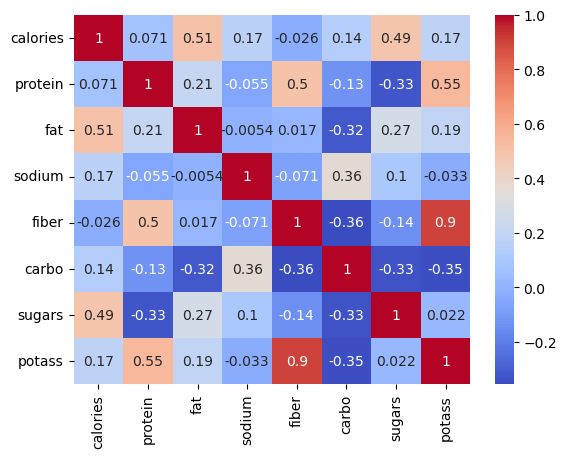

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# Assuming your DataFrame is named df
# Replace the column names if they are different in your actual dataset
# I'm using hypothetical categorical and numerical columns for demonstration

# Covariance Matrix
cov_matrix = np.cov(df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']], rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

# Correlation
correlation_matrix = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Chi-square Test (example with hypothetical categorical data)
observed_table = pd.crosstab(df['mfr'], df['type'])
chi2, p_chi2, _, _ = chi2_contingency(observed_table)
print("\nChi-square Test:")
print(f"Chi2 Statistic: {chi2}\nP-value: {p_chi2}")

# Z-test or t-test (example with hypothetical numerical data)
group1 = df[df['shelf'] == 1]['rating']
group2 = df[df['shelf'] == 2]['rating']
t_stat, p_ttest = ttest_ind(group1, group2)
print("\nT-test:")
print(f"T-statistic: {t_stat}\nP-value: {p_ttest}")

# ANOVA (example with hypothetical numerical data)
group1 = df[df['shelf'] == 1]['rating']
group2 = df[df['shelf'] == 2]['rating']
group3 = df[df['shelf'] == 3]['rating']
f_stat, p_anova = f_oneway(group1, group2, group3)
print("\nANOVA:")
print(f"F-statistic: {f_stat}\nP-value: {p_anova}")

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Load the dataset
df = pd.read_csv('https://www.dropbox.com/s/x7wyl5clbr8u9vd/cereal.csv?dl=1')

# Extract the numerical columns
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values

# Perform SVD
svd = TruncatedSVD(n_components=1)
X_svd = svd.fit_transform(X)

# Add the SVD results to the original dataframe
df['svd'] = X_svd

# Print the first 5 rows of the dataframe
print(df.head())


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating         svd  
0    5.0       6     280        25      3     1.0  0.33  68.402973  256.707983  
1    8.0       8     135         0      3     1.0  1.00  33.983679  125.171785  
2    7.0       5     320        25      3     1.0  0.33  59.425505  373.661255  
3    8.0       0     330        25      3     1.0  0.50  93.704912  277.117801  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  206.624754  


In [18]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#pca feature reduction 

# Load the dataset
df = pd.read_csv('https://www.dropbox.com/s/x7wyl5clbr8u9vd/cereal.csv?dl=1')

# Create the target variable
df['target'] = df['mfr'].apply(lambda x: 0 if x=='N' else 1)

# Create the feature matrix and target vector
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values
y = df['target'].values

# Create an LDA object and fit the data
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

# Add the LDA results to the original dataframe
df['lda'] = X_lda

# Print the first 5 rows of the dataframe
print(df.head())


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  target  \
0    5.0       6     280        25      3     1.0  0.33  68.402973       0   
1    8.0       8     135         0      3     1.0  1.00  33.983679       1   
2    7.0       5     320        25      3     1.0  0.33  59.425505       1   
3    8.0       0     330        25      3     1.0  0.50  93.704912       1   
4   14.0       8      -1        25      3     1.0  0.75  34.384843       1   

        lda  
0  1.032107  
1 -0.127940  
2 -0.808

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values
y = df['target'].values
#pca feature reduction 
# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_std)

# Now X_pca contains the reduced-dimensional represen
print(df.head())


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  target  \
0    5.0       6     280        25      3     1.0  0.33  68.402973       0   
1    8.0       8     135         0      3     1.0  1.00  33.983679       1   
2    7.0       5     320        25      3     1.0  0.33  59.425505       1   
3    8.0       0     330        25      3     1.0  0.50  93.704912       1   
4   14.0       8      -1        25      3     1.0  0.75  34.384843       1   

        lda  
0  1.032107  
1 -0.127940  
2 -0.808

Training Accuracy: 0.3770491803278688
Test Accuracy: 0.375

Confusion Matrix:
[[3 0 0 0 0 0]
 [2 3 0 0 0 0]
 [0 2 0 0 0 0]
 [0 1 0 0 0 0]
 [2 0 0 0 0 0]
 [3 0 0 0 0 0]]


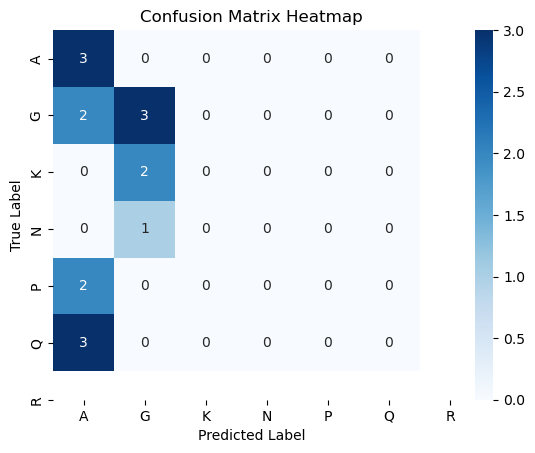

The model might be overfitting.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#NB

# Create the feature matrix and target vector
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values
y = df['mfr'].values

# Scale the numerical features to a range of 0-1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the classifier and print the score
accuracy_train = nb.score(X_train, y_train)
accuracy_test = nb.score(X_test, y_test)

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a heatmap for visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Print the assessment of overfitting or underfitting
if accuracy_train > accuracy_test:
    print("The model might be overfitting.")
elif accuracy_train < accuracy_test:
    print("The model might be underfitting.")
else:
    print("The model seems to be fitting well.")


In [34]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'target', 'lda'],
      dtype='object')

Training Accuracy using Entropy: 1.0
Test Accuracy using Entropy: 0.5
Error Estimation using Entropy: 0.5

Confusion Matrix using Entropy:
[[3 0 0 0 0 0]
 [0 3 0 1 0 1]
 [0 2 0 0 0 0]
 [0 1 0 0 0 0]
 [2 0 0 0 0 0]
 [0 1 0 0 0 2]]


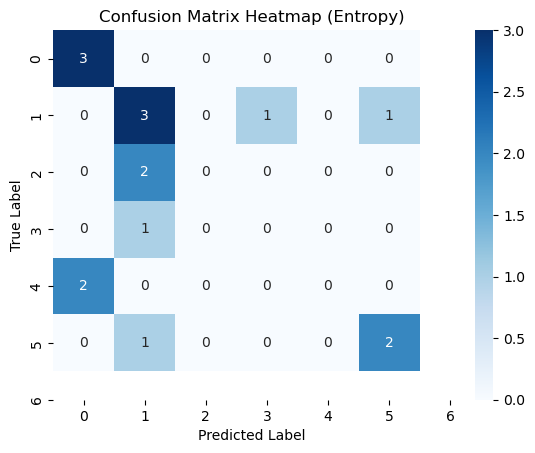

The model might be overfitting.


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode 'mfr' and 'type' columns
df['mfr_encoded'] = label_encoder.fit_transform(df['mfr'])
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Separate features (X) and target variable (y)
X = df.drop(['name', 'mfr_encoded', 'target', 'mfr', 'type'], axis=1)
y = df['mfr_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with Entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy')

# Fit the model on the training data
clf_entropy.fit(X_train, y_train)

# Make predictions on the test set
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate and print the accuracy
accuracy_train_entropy = clf_entropy.score(X_train, y_train)
accuracy_test_entropy = accuracy_score(y_test, y_pred_entropy)

print("Training Accuracy using Entropy:", accuracy_train_entropy)
print("Test Accuracy using Entropy:", accuracy_test_entropy)

# Calculate error estimation
error_estimation_entropy = 1.0 - accuracy_test_entropy
print('Error Estimation using Entropy:', format(error_estimation_entropy))

# Print the confusion matrix
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print("\nConfusion Matrix using Entropy:")
print(conf_matrix_entropy)

# Visualize the confusion matrix with a heatmap
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Blues', xticklabels=clf_entropy.classes_, yticklabels=clf_entropy.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Entropy)')
plt.show()

# Print the assessment of overfitting or underfitting
if accuracy_train_entropy > accuracy_test_entropy:
    print("The model might be overfitting.")
elif accuracy_train_entropy < accuracy_test_entropy:
    print("The model might be underfitting.")
else:
    print("The model seems to be fitting well.")


In [29]:
print(df.dtypes)

name               object
mfr                object
type               object
calories            int64
protein             int64
fat                 int64
sodium              int64
fiber             float64
carbo             float64
sugars              int64
potass              int64
vitamins            int64
shelf               int64
weight            float64
cups              float64
rating            float64
target              int64
lda               float64
target_encoded      int64
dtype: object


Training Accuracy: 0.7924528301886793
Testing Accuracy: 0.5

Confusion Matrix (Testing set):
[[6 0 0 0 0 0]
 [1 4 0 1 0 1]
 [0 2 0 0 0 0]
 [1 3 0 0 0 0]
 [2 0 0 0 0 0]
 [0 1 0 0 0 2]]


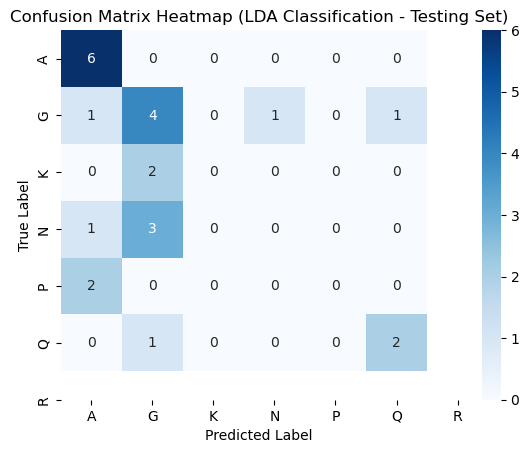

The model might be overfitting.


In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#lda classification

# Convert the categorical data to numerical labels
df['type'] = df['type'].astype('category').cat.codes

# Split the data into training and testing sets
X = df.drop(['name', 'mfr'], axis=1)
y = df['mfr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Discriminant Analysis (LDA) model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Make predictions
prediction_train = lda_model.predict(X_train)
prediction_test = lda_model.predict(X_test)

# Calculate accuracy
accuracy_train_lda = accuracy_score(y_train, prediction_train)
accuracy_test_lda = accuracy_score(y_test, prediction_test)
print('Training Accuracy:', format(accuracy_train_lda))
print('Testing Accuracy:', format(accuracy_test_lda))

# Generate the confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, prediction_test)
print("\nConfusion Matrix (Testing set):")
print(conf_matrix_test)

# Visualize the confusion matrix with a heatmap for testing set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (LDA Classification - Testing Set)')
plt.show()

# Print the assessment of overfitting or underfitting
if accuracy_train_lda > accuracy_test_lda:
    print("The model might be overfitting.")
elif accuracy_train_lda < accuracy_test_lda:
    print("The model might be underfitting.")
else:
    print("The model seems to be fitting well.")


Training Accuracy: 1.0
Testing Accuracy: 0.9166666666666666

Confusion Matrix (Testing set):
[[ 0  2]
 [ 0 22]]


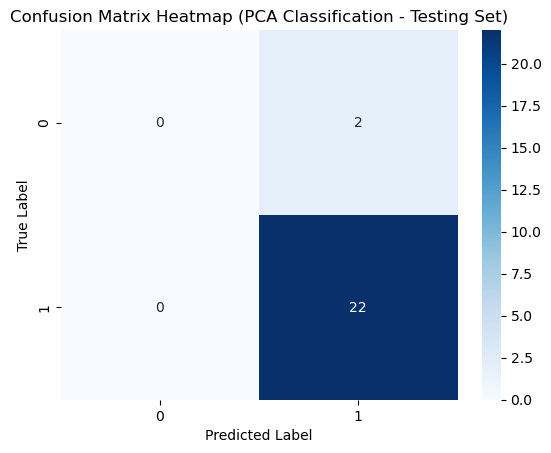

The model might be overfitting.


In [41]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#pca classification

# Load the dataset
df = pd.read_csv('https://www.dropbox.com/s/x7wyl5clbr8u9vd/cereal.csv?dl=1')

# Create the target variable
df['target'] = df['mfr'].apply(lambda x: 0 if x == 'N' else 1)

# Create the feature matrix and target vector
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values
y = df['target'].values

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions for both training and testing sets
prediction_train = rf_classifier.predict(X_train)
prediction_test = rf_classifier.predict(X_test)

# Calculate accuracy for both training and testing sets
accuracy_train_rf = accuracy_score(y_train, prediction_train)
accuracy_test_rf = accuracy_score(y_test, prediction_test)
print('Training Accuracy:', format(accuracy_train_rf))
print('Testing Accuracy:', format(accuracy_test_rf))

# Generate the confusion matrix for testing set
conf_matrix_test_rf = confusion_matrix(y_test, prediction_test)
print("\nConfusion Matrix (Testing set):")
print(conf_matrix_test_rf)

# Visualize the confusion matrix with a heatmap for testing set
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (PCA Classification - Testing Set)')
plt.show()

# Print the assessment of overfitting or underfitting
if accuracy_train_rf > accuracy_test_rf:
    print("The model might be overfitting.")
elif accuracy_train_rf < accuracy_test_rf:
    print("The model might be underfitting.")
else:
    print("The model seems to be fitting well.")



In [37]:
print(df['mfr'].unique())

['N' 'Q' 'K' 'R' 'G' 'P' 'A']


In [38]:
mfr_map = {'K': 1, 'G': 2, 'P': 3, 'Q': 4, 'R': 5, 'N': 6, 'A': 7}
df['mfr'] = df['mfr'].map(mfr_map)

Training Accuracy: 1.0
Testing Accuracy: 0.75
The model may be overfitting.


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


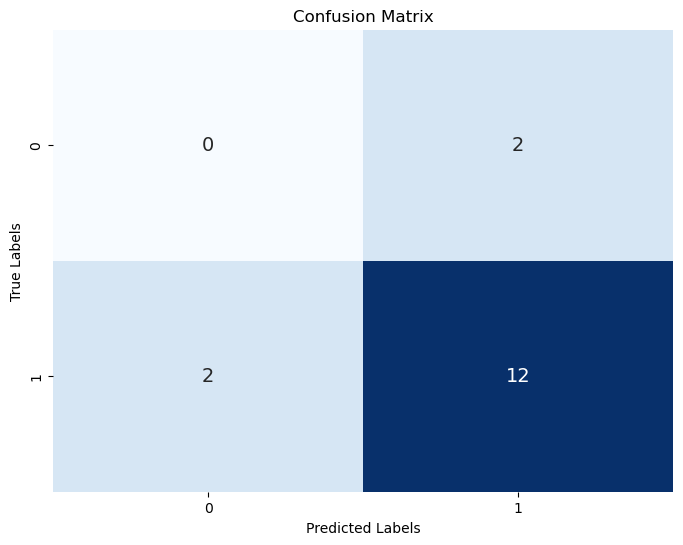

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#KNN

# Create the target variable
df['target'] = df['mfr'].apply(lambda x: 0 if x=='N' else 1)

# Create the feature matrix and target vector
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values
y = df['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple neural network model
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Display accuracy
print(f'Training Accuracy: {accuracy_train}')
print(f'Testing Accuracy: {accuracy_test}')

# Analyze overfitting/underfitting
if accuracy_train > accuracy_test:
    print('The model may be overfitting.')
elif accuracy_train < accuracy_test:
    print('The model may be underfitting.')
else:
    print('The model seems to be fitting well.')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Training Accuracy: 1.0
Testing Accuracy: 0.75
The model may be overfitting.


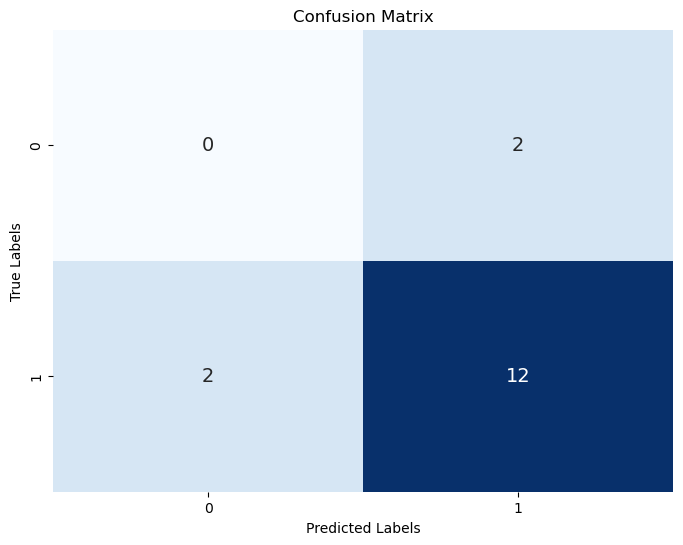

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
#NN

# Create the target variable
df['target'] = df['mfr'].apply(lambda x: 0 if x=='N' else 1)

# Create the feature matrix and target vector
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values
y = df['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Create a simple neural network model
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Display accuracy
print(f'Training Accuracy: {accuracy_train}')
print(f'Testing Accuracy: {accuracy_test}')

# Analyze overfitting/underfitting
if accuracy_train > accuracy_test:
    print('The model may be overfitting.')
elif accuracy_train < accuracy_test:
    print('The model may be underfitting.')
else:
    print('The model seems to be fitting well.')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Confusion Matrix:
[[ 0  0  0  0  0  1  0]
 [ 0  4 18  0  0  0  0]
 [ 0  5 18  0  0  0  0]
 [ 0  1  4  0  0  1  0]
 [ 0  2  7  0  0  0  0]
 [ 1  0  7  0  0  0  0]
 [ 0  2  6  0  0  0  0]]


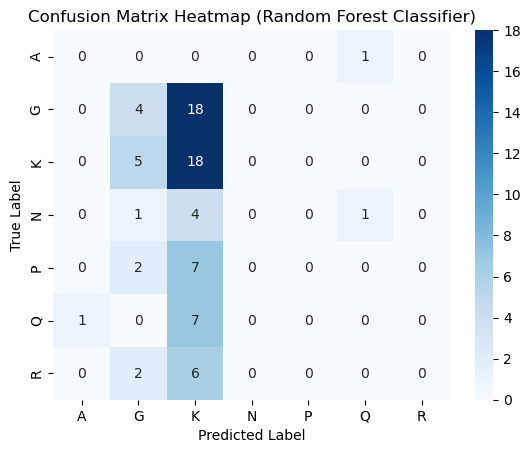

Accuracy: 0.2857142857142857
Error rate: 0.7142857142857143
Precision: 0.17124304267161408
Recall: 0.2857142857142857
F-measure: 0.19304925329021716


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#k-folld
# Assuming your DataFrame is named df
# Assuming X and y are defined as features and target variable
X = df.drop(['name', 'mfr'], axis=1)
y = df['mfr']

# Identify categorical columns
categorical_columns = ['type']  # Add more if you have other categorical columns

# Create a column transformer with one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline with the preprocessor and the RandomForestClassifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Get unique classes from the target variable
unique_classes = np.unique(y)

# Perform K-fold cross-validation and get predicted labels
y_pred = cross_val_predict(clf, X, y, cv=5)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix with a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Random Forest Classifier)')
plt.show()

# Calculate and display additional metrics
accuracy = accuracy_score(y, y_pred)
error_rate = 1 - accuracy
precision, recall, f_measure, _ = precision_recall_fscore_support(y, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Error rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f_measure)


In [47]:
# Training set performance
train_accuracy = model.score(X_train, y_train)

# Test set performance
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
# overfitting 

Training Accuracy: 0.5901639344262295
Test Accuracy: 0.3125


In [6]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,svd
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,256.707983
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,125.171785
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,373.661255
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,277.117801
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,206.624754


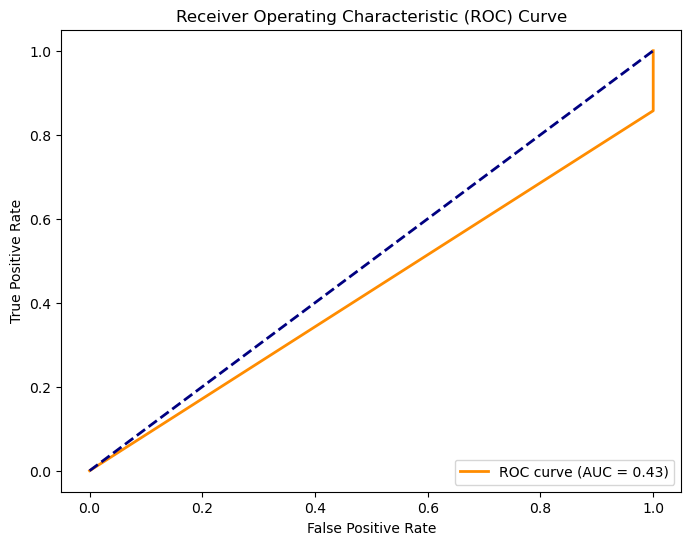

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import warnings

# Load the dataset
df = pd.read_csv('https://www.dropbox.com/s/x7wyl5clbr8u9vd/cereal.csv?dl=1')

# Create the target variable
df['target'] = df['mfr'].apply(lambda x: 0 if x=='N' else 1)

# Create the feature matrix and target vector
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values
y = df['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Create a simple neural network model
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Display ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

